In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = "."
student_dataset = path +'/student_success.csv'
student_dataframe = pd.read_csv(student_dataset)

Missing Values:
 Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activitie

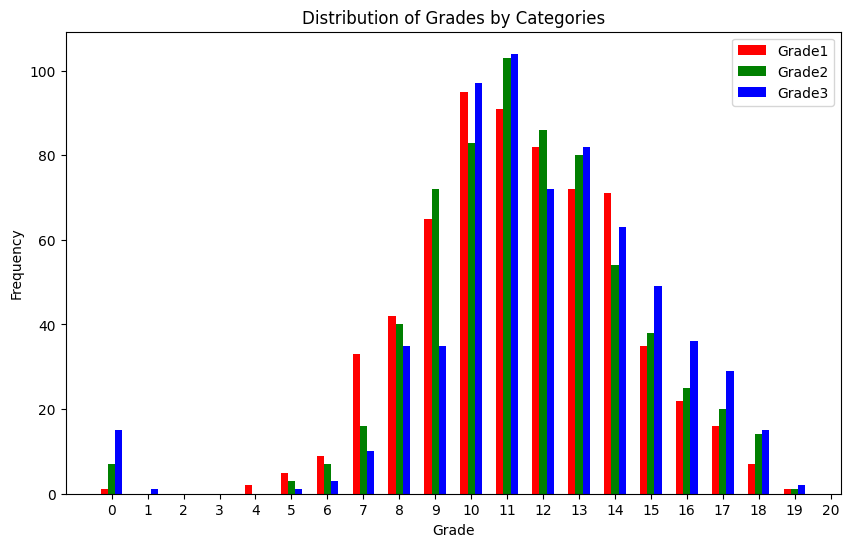

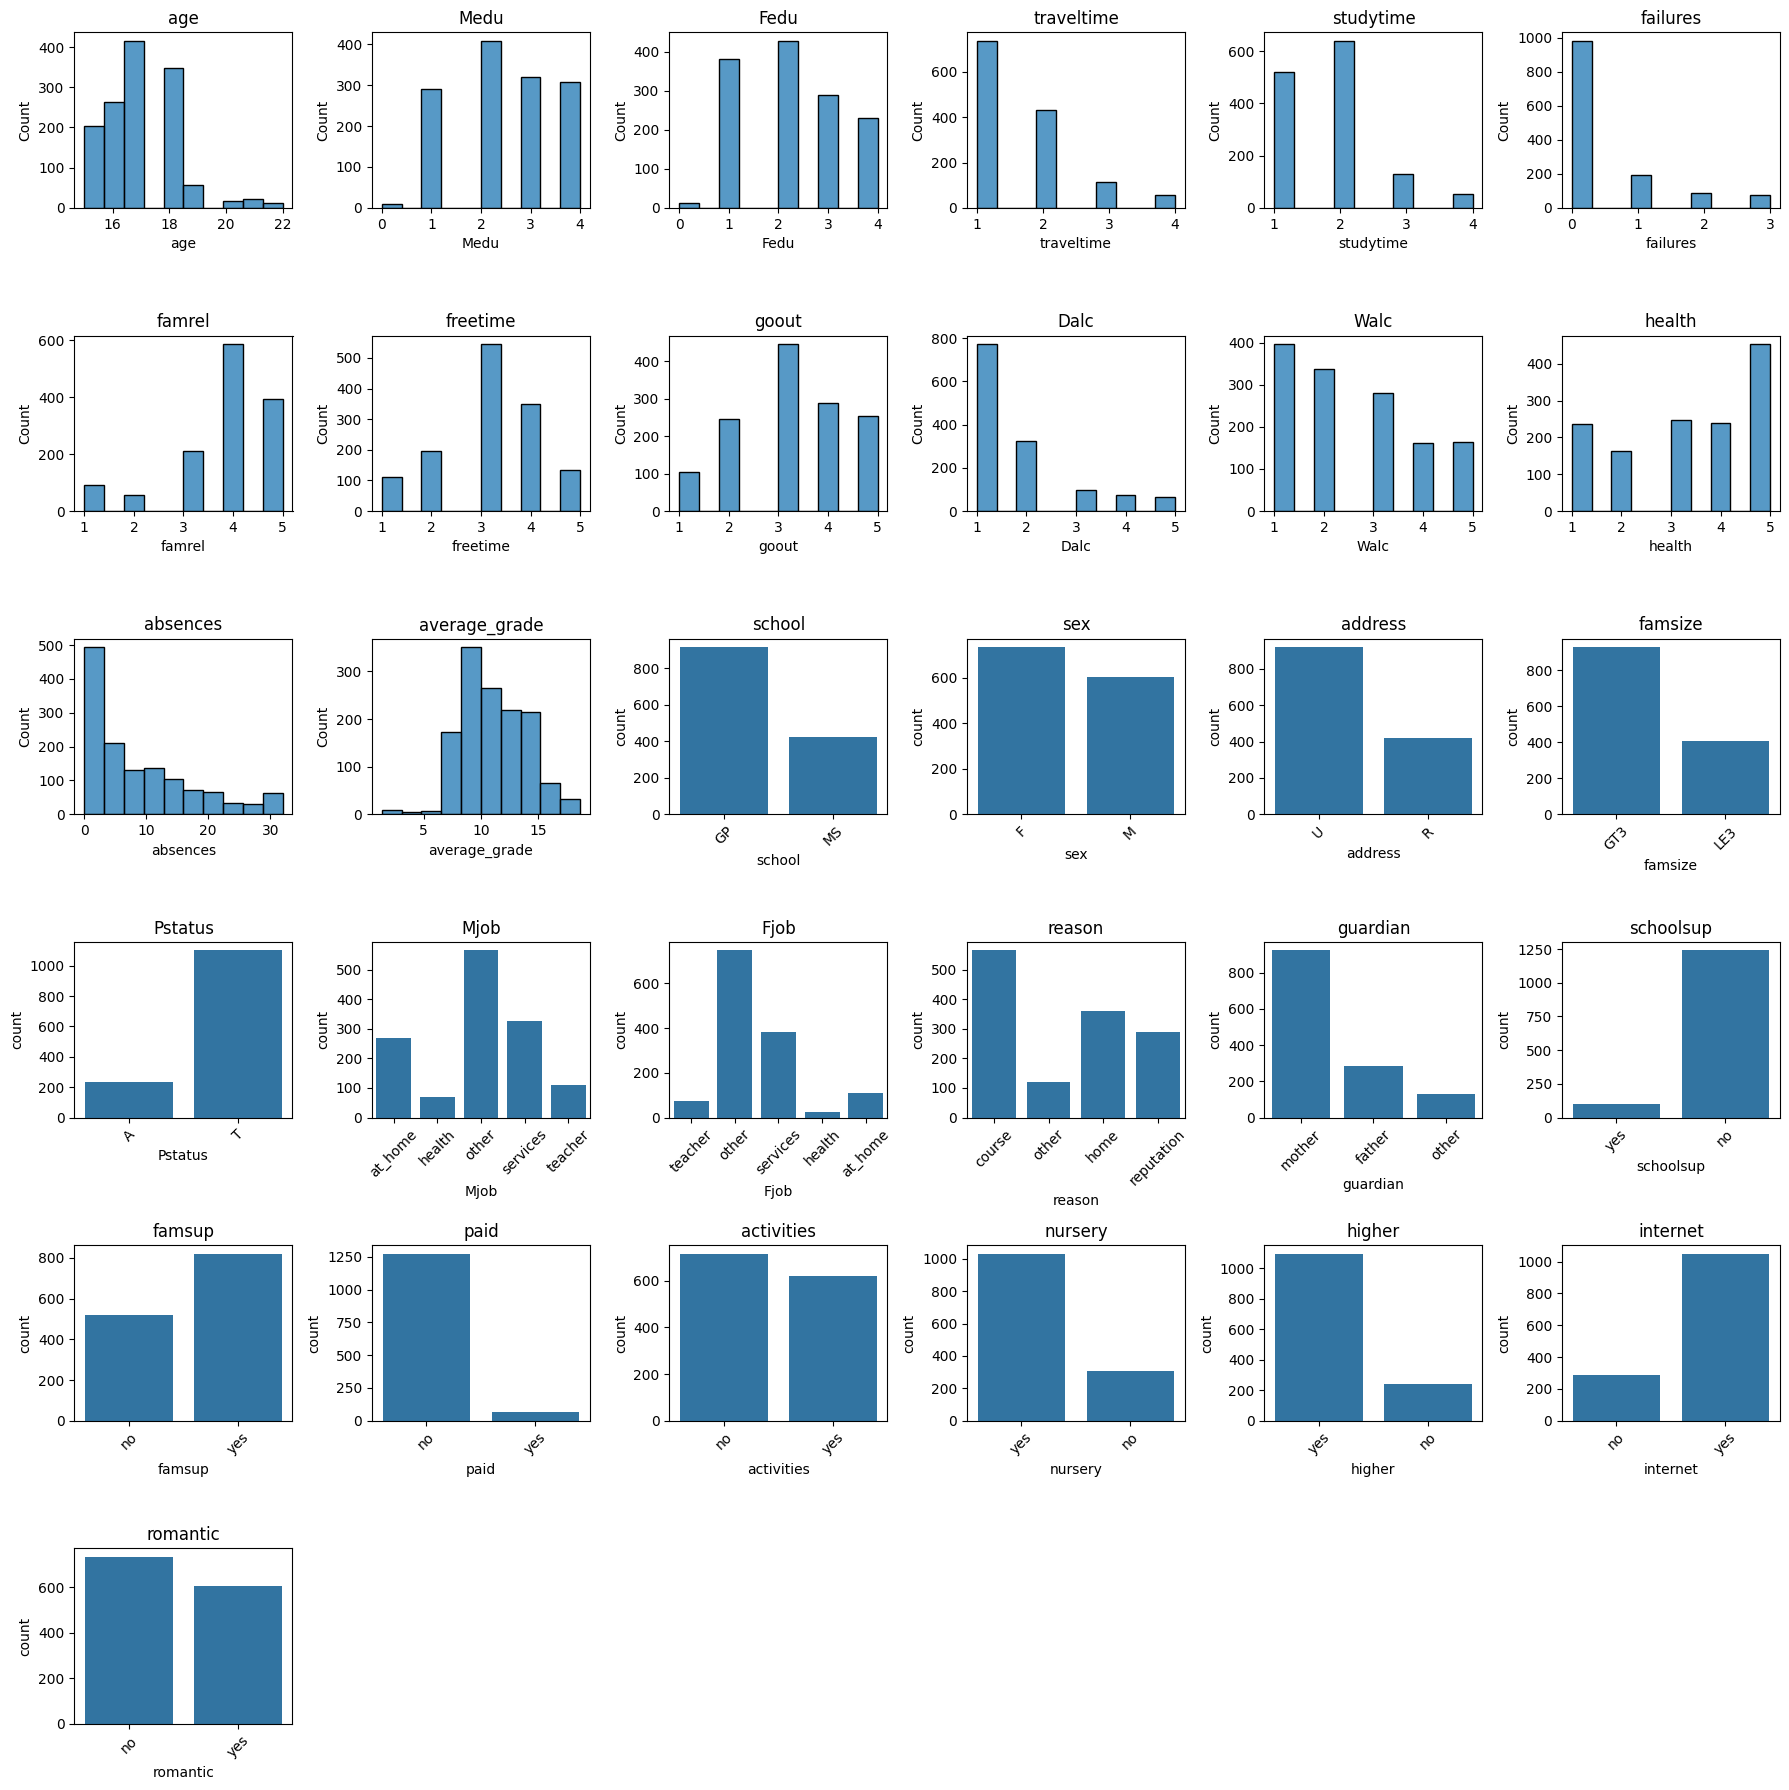

<Figure size 1000x600 with 0 Axes>

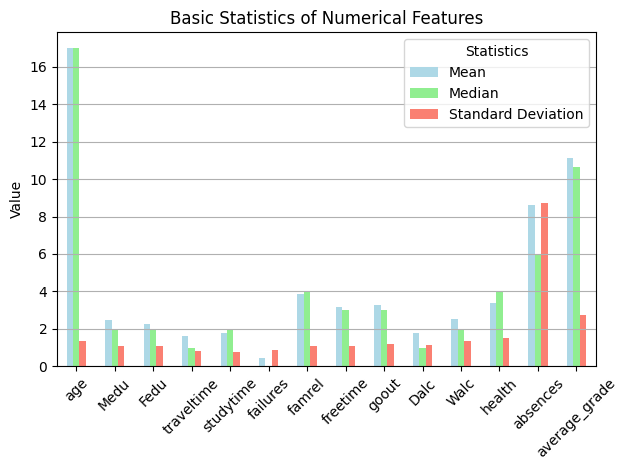

In [3]:
from sklearn.utils import resample
# Find if there is missing data in dataset
missing_values = student_dataframe.isnull().sum()
missing_percentage = (missing_values / len(student_dataframe)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("Missing Values:\n", missing_data[missing_data['Missing Values'] > 0])

# Exploring the data types in columns
student_dataframe.info()

# Visualization by histogram
all_grades = pd.concat([student_dataframe['G1'], student_dataframe['G2'], student_dataframe['G3']])
grade1_counts = student_dataframe['G1'].value_counts().sort_index()
grade2_counts = student_dataframe['G2'].value_counts().sort_index()
grade3_counts = student_dataframe['G3'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.bar(grade1_counts.index - 0.2, grade1_counts.values, width=0.2, color='red', align='center', label='Grade1')
plt.bar(grade2_counts.index, grade2_counts.values, width=0.2, color='green', align='center', label='Grade2')
plt.bar(grade3_counts.index + 0.2, grade3_counts.values, width=0.2, color='blue', align='center', label='Grade3')
plt.title('Distribution of Grades by Categories')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(range(0, 21))
plt.legend()
plt.show()

# New numeric data column to show average grade of each student
student_dataframe['average_grade'] = student_dataframe[['G1', 'G2', 'G3']].mean(axis=1)

categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 'romantic'
]
numerical_columns = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
    'health', 'absences', 'average_grade'
]

# synthetic data producing with Resampling 
columns_to_resample = ['traveltime', 'failures', 'famrel', 'studytime', 'absences','studytime']
for column in columns_to_resample:
    for class_value in student_dataframe[column].unique():
        class_data = student_dataframe[student_dataframe[column] == class_value]
        
        if len(class_data) < 30: 
            class_data_resampled = resample(class_data, 
                                             replace=True,  
                                             n_samples=30,   
                                             random_state=42)
            
            student_dataframe = pd.concat([student_dataframe, class_data_resampled], ignore_index=True)

# histogram distribution of all features
columns = numerical_columns + categorical_columns
num_columns = len(columns)

num_rows = (num_columns + 5) // 6 
fig, axes = plt.subplots(num_rows, 6, figsize=(18, 3 * num_rows)) 
axes = axes.flatten()

for i, column in enumerate(columns):
    if column in numerical_columns:
        sns.histplot(student_dataframe[column], bins=10, kde=False, ax=axes[i])
    else:
        sns.countplot(x=student_dataframe[column], ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# statistical analysis
statistics = {
    'Mean': student_dataframe[numerical_columns].mean(),
    'Median': student_dataframe[numerical_columns].median(),
    'Standard Deviation': student_dataframe[numerical_columns].std()
}
statistics_df = pd.DataFrame(statistics)
# Görselleştirme
plt.figure(figsize=(10, 6))
statistics_df.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Basic Statistics of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [4]:
# IQR Outlier analysis and cleaning the data  
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_dict = {}
for column in numerical_columns:
    outlier_dict[column] = find_outliers_iqr(student_dataframe[column])

outliers_df = pd.DataFrame(dict(outlier_dict)).dropna()
cleaned_data = student_dataframe[~student_dataframe.isin(outliers_df).any(axis=1)]
print("Outliers:\n", outliers_df)

Outliers:
 Empty DataFrame
Columns: [age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health, absences, average_grade]
Index: []


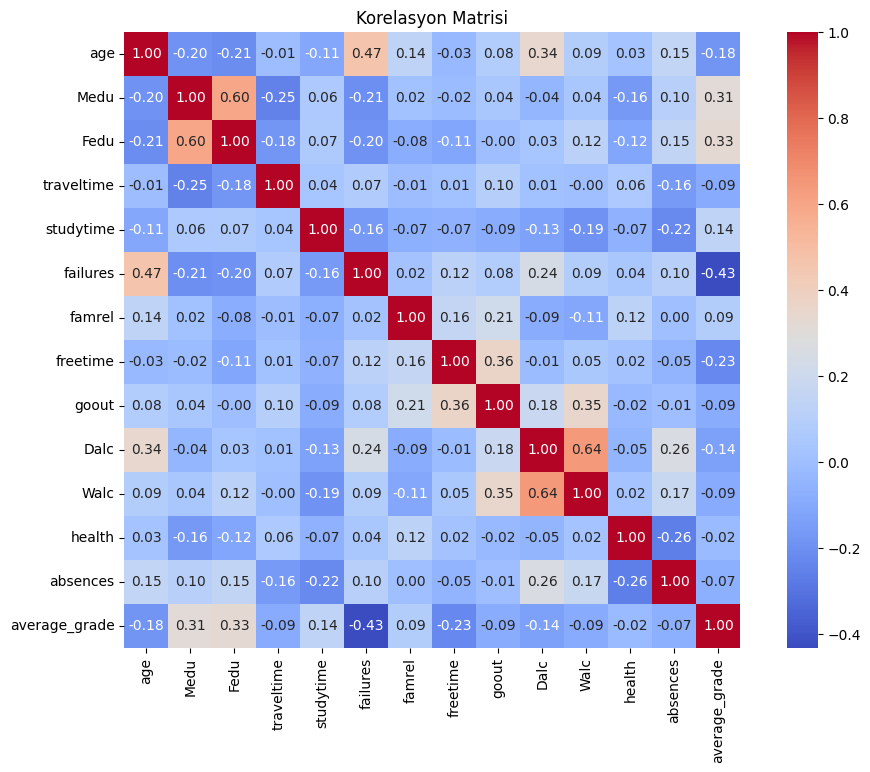

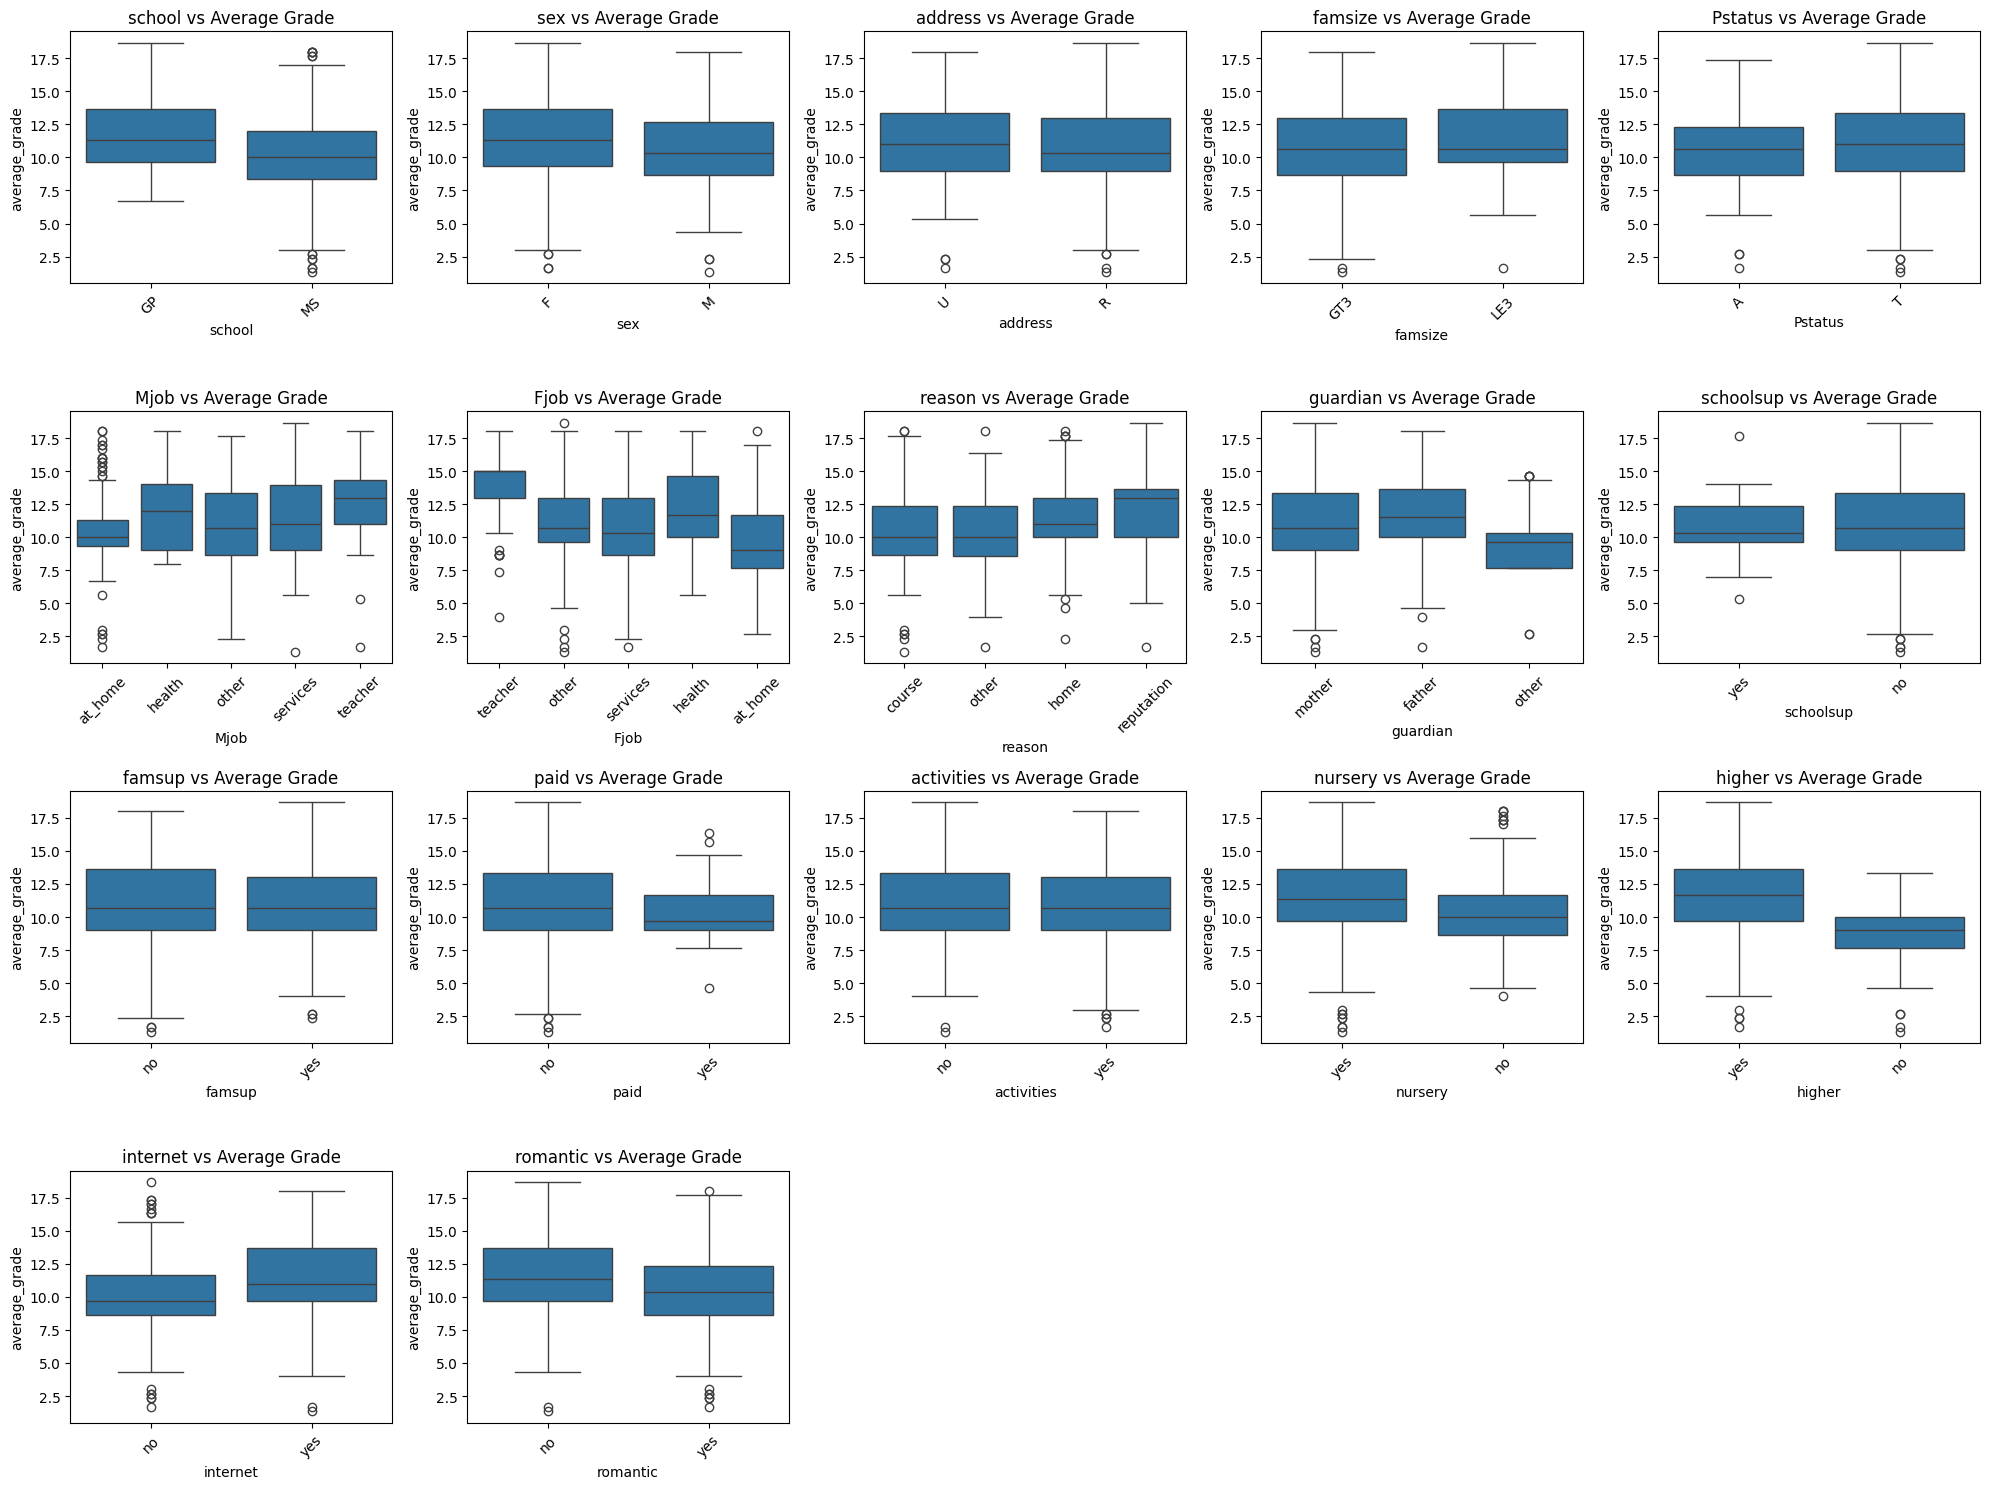

In [5]:
# correlation between numeric columns
correlation_matrix = student_dataframe[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korelasyon Matrisi')
plt.show()

# relation between categorical columns and average notes
plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=student_dataframe[column], y=student_dataframe['average_grade'])
    plt.title(f'{column} vs Average Grade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

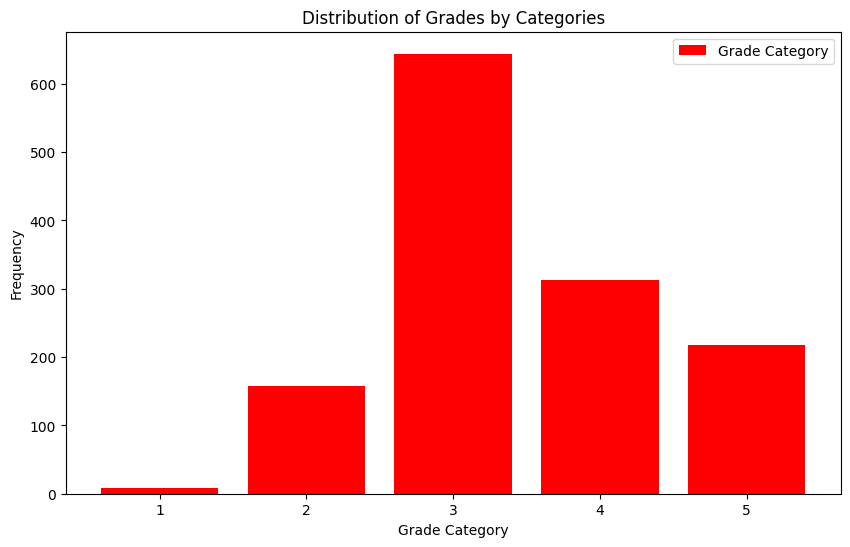

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier


def categorize_grade(grade):
    if grade < 4:
        return 1
    elif 4 <= grade < 8:
        return 2
    elif 8 <= grade < 12:
        return 3
    elif 12 <= grade < 14:
        return 4
    else:
        return 5

student_dataframe['grade_category'] = student_dataframe['average_grade'].apply(categorize_grade)
grade_order = [1, 2, 3, 4, 5]
student_dataframe['grade_category'] = pd.Categorical(student_dataframe['grade_category'], categories=grade_order, ordered=True)

counts_grade_categories = student_dataframe['grade_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(counts_grade_categories.index, counts_grade_categories.values, color='red', align='center', label='Grade Category')
plt.title('Distribution of Grades by Categories')
plt.xlabel('Grade Category')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# drop target features
X = student_dataframe.drop(columns=['average_grade', 'G1', 'G2', 'G3', 'grade_category'])
y = student_dataframe['grade_category']

# categorical to numeric
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# normalization with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# dimension reduction with PCA
pca = PCA(n_components=3) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) 

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

def evaluate_model(y_test, y_pred, model_name):
    # Calculate accuracy, confusion matrix, and classification report as before
    print(f'{model_name} Evaluation:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred, zero_division=0))

def compute_ROC_AUC(y_test, model_name, model):
    
    y_score = model.predict_proba(X_test_pca) 
    # Binarize the labels for ROC curve computation
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_test))):
        if len(np.unique(y_test_bin[:, i])) == 1:
            continue
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(len(np.unique(y_test))), colors):
        if i in fpr:
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
# Models and possible parameters
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}
}

# Logistic Regression best parameters
log_reg = LogisticRegression(max_iter=1000)
grid_log_reg = GridSearchCV(log_reg, param_grids['Logistic Regression'], cv=5)
grid_log_reg.fit(X_train_pca, y_train)
best_log_reg = grid_log_reg.best_estimator_

# Random Forest best parameters
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grids['Random Forest'], cv=5)
grid_rf.fit(X_train_pca, y_train)
best_rf = grid_rf.best_estimator_

# Gradient Boosting best parameters
gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb, param_grids['Gradient Boost'], cv=5)
grid_gb.fit(X_train_pca, y_train)
best_gb = grid_gb.best_estimator_

print(f"Best Logistic Regression Parameters: {grid_log_reg.best_params_}")
print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
print(f"Best Gradient Boosting Parameters: {grid_gb.best_params_}")

Best Logistic Regression Parameters: {'C': 0.1}
Best Random Forest Parameters: {'max_depth': 20, 'n_estimators': 100}
Best Gradient Boosting Parameters: {'learning_rate': 1, 'n_estimators': 100}


In [9]:
# Logistic Regression predict test set
log_reg = LogisticRegression(max_iter=1000, C=grid_log_reg.best_params_['C'])
log_reg.fit(X_train_pca, y_train)
y_pred_log_reg = log_reg.predict(X_test_pca)

# Random Forest predict test set
rf = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'],
                            max_depth=grid_rf.best_params_['max_depth'],
                            random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)

# Gradient Boosting predict test set
gb = GradientBoostingClassifier(n_estimators=grid_gb.best_params_['n_estimators'],
                                learning_rate=grid_gb.best_params_['learning_rate'],
                                random_state=42)
gb.fit(X_train_pca, y_train)
y_pred_gb = gb.predict(X_test_pca)

In [10]:
# Blending 3 models
X_test_blend = np.column_stack((y_pred_log_reg, y_pred_rf, y_pred_gb))
blend_model = LogisticRegression(max_iter=1000, random_state=42)
blend_model.fit(X_test_blend, y_test)

# blending model predictions
y_pred_blend = blend_model.predict(X_test_blend)

# voting classifier with lr, rf, gb
voting_model = VotingClassifier(
    estimators=[
        ('lr', best_log_reg),
        ('rf', best_rf),
        ('gb', best_gb)
    ], voting='soft'
)
voting_model.fit(X_train_pca, y_train)
y_pred_voting = voting_model.predict(X_test_pca)

logistic regression Evaluation:
Accuracy: 0.50
Confusion Matrix:
[[  0   0   2   0   0]
 [  0   0  30   0   1]
 [  0   1 115   6   7]
 [  0   0  52   3   8]
 [  0   0  23   5  15]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        31
           3       0.52      0.89      0.66       129
           4       0.21      0.05      0.08        63
           5       0.48      0.35      0.41        43

    accuracy                           0.50       268
   macro avg       0.24      0.26      0.23       268
weighted avg       0.38      0.50      0.40       268



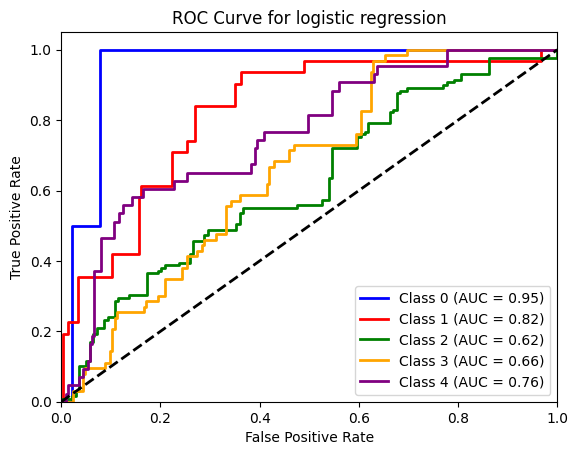

random forest Evaluation:
Accuracy: 0.79
Confusion Matrix:
[[  1   0   1   0   0]
 [  0  29   1   0   1]
 [  0   0 118   6   5]
 [  0   1  13  37  12]
 [  0   2   9   6  26]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.91      0.94      0.92        31
           3       0.83      0.91      0.87       129
           4       0.76      0.59      0.66        63
           5       0.59      0.60      0.60        43

    accuracy                           0.79       268
   macro avg       0.82      0.71      0.74       268
weighted avg       0.78      0.79      0.78       268



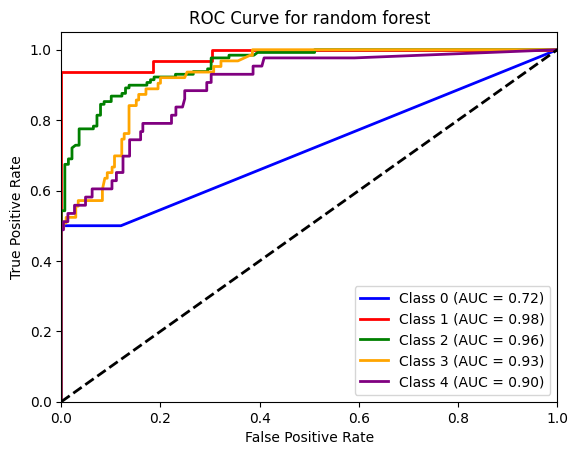

gradint boosting Evaluation:
Accuracy: 0.78
Confusion Matrix:
[[  1   0   1   0   0]
 [  0  29   1   0   1]
 [  1   2 111  11   4]
 [  0   0   9  42  12]
 [  0   2  10   5  26]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.88      0.94      0.91        31
           3       0.84      0.86      0.85       129
           4       0.72      0.67      0.69        63
           5       0.60      0.60      0.60        43

    accuracy                           0.78       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.78      0.78      0.78       268



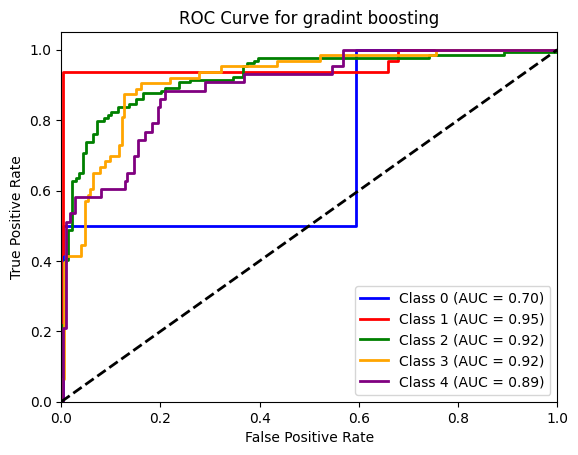

blending Evaluation:
Accuracy: 0.78
Confusion Matrix:
[[  0   1   1   0   0]
 [  0  29   1   0   1]
 [  0   1 121   6   1]
 [  0   0  18  40   5]
 [  0   0  13  11  19]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.94      0.94      0.94        31
           3       0.79      0.94      0.86       129
           4       0.70      0.63      0.67        63
           5       0.73      0.44      0.55        43

    accuracy                           0.78       268
   macro avg       0.63      0.59      0.60       268
weighted avg       0.77      0.78      0.76       268



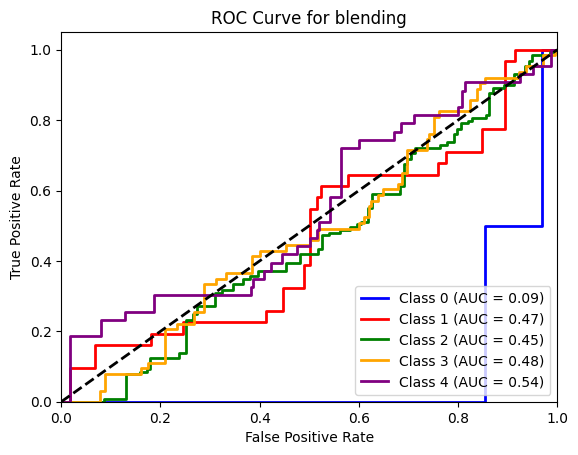

majority voting Evaluation:
Accuracy: 0.78
Confusion Matrix:
[[  1   0   1   0   0]
 [  0  29   1   0   1]
 [  0   1 115   9   4]
 [  0   0  15  38  10]
 [  0   1  12   4  26]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.94      0.94      0.94        31
           3       0.80      0.89      0.84       129
           4       0.75      0.60      0.67        63
           5       0.63      0.60      0.62        43

    accuracy                           0.78       268
   macro avg       0.82      0.71      0.75       268
weighted avg       0.78      0.78      0.77       268



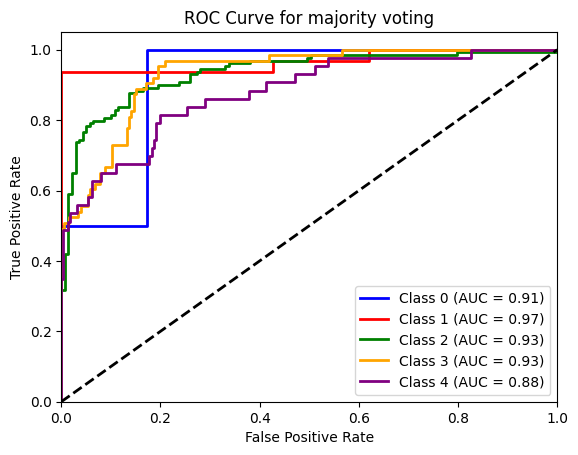

In [11]:
# Evaluations and performance visualizations 
evaluate_model(y_test, y_pred_log_reg, 'logistic regression')
compute_ROC_AUC(y_test, 'logistic regression', best_log_reg)

evaluate_model(y_test, y_pred_rf, 'random forest')
compute_ROC_AUC(y_test, 'random forest', best_rf)

evaluate_model(y_test, y_pred_gb, 'gradint boosting')
compute_ROC_AUC(y_test, 'gradint boosting', best_gb)

evaluate_model(y_test, y_pred_blend, 'blending')
compute_ROC_AUC(y_test, 'blending', blend_model)

evaluate_model(y_test, y_pred_voting, 'majority voting')
compute_ROC_AUC(y_test, 'majority voting', voting_model)

Logistic Regression Accuracy: 0.50
Random Forest Accuracy: 0.79
Gradient Boosting Accuracy: 0.78
Blending with Lr, Rf, Gb Accuracy: 0.78
Majority Voting Accuracy: 0.78


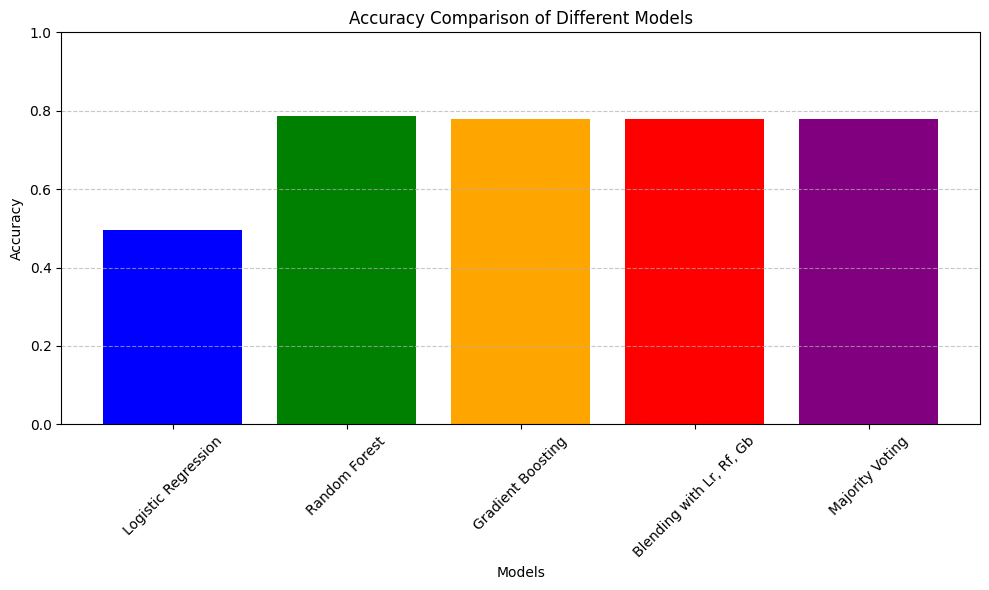

In [12]:
# Overall accuracy comparision
models = {
    'Logistic Regression': {
        'model': best_log_reg,
        'predictions': y_pred_log_reg
    },
    'Random Forest': {
        'model': best_rf,
        'predictions': y_pred_rf
    },
    'Gradient Boosting': {
        'model': best_gb,
        'predictions':y_pred_gb
    },
    'Blending with Lr, Rf, Gb': {
        'model': blend_model,
        'predictions': y_pred_blend
    },
    'Majority Voting': {
        'model': voting_model,
        'predictions': y_pred_voting
    },
}

model_names = []
model_accuracies = []

# Calculate accuracy for each model
for model_name, model_info in models.items():
    y_pred = model_info['predictions']
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(model_name)
    model_accuracies.append(accuracy)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0.0, 1.0])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()